## Reaction diffusion simulation in OpenPNM


In [1]:
import numpy
import openpnm
import matplotlib.pyplot as plt

numpy.set_printoptions(precision=5)
%matplotlib inline

## Create a network

In [3]:
pn = openpnm.network.Cubic(shape=[40, 40], spacing=1e-4)

------------------------------------------------------------
CRITICAL   : front and back labels have been switched to obey the right-hand rule 
SOURCE     : openpnm.network.Cubic.__init__ 
TIME STAMP : 2022-03-28 05:24:01,840
------------------------------------------------------------


In [7]:
print(type(pn))

<class 'openpnm.network.Cubic.Cubic'>


In [6]:
geo = openpnm.geometry.StickAndBall(network=pn, pores=pn.Ps, throats=pn.Ts)

## Specify a phase and physics

In [8]:
gas = openpnm.phases.Air(network=pn)

In [9]:
phys = openpnm.physics.Standard(network=pn, geometry=geo, phase=gas)

## Setup initial and boundary conditions

In [10]:
# Setup the initial concentration across the network
gas['pore.concentration'] = 0

# Specify reaction sink. Using reaction rate law rate = A*(C^B) with B=1
phys['pore.sinkA'] = -1e-9
phys['pore.sinkB'] = 1
phys.add_model(propname='pore.sink', model=openpnm.models.physics.generic_source_term.power_law,
              A1='pore.sinkA', A2='pore.sinkB', X='pore.concentration')

# Specify reaction source
phys['pore.srcA'] = +1e-11
phys['pore.srcB'] = 1
phys.add_model(propname='pore.source', model=openpnm.models.physics.generic_source_term.power_law,
              A1='pore.srcA', A2='pore.srcB', X='pore.concentration')

## Plot the initial network condition

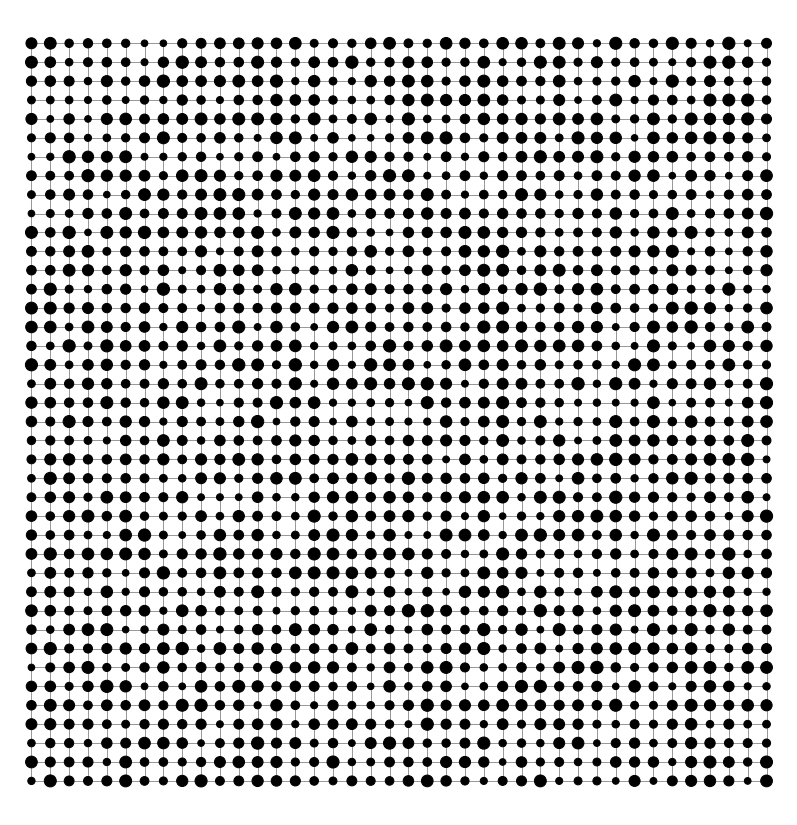

In [15]:
pn['pore.concentration'] = gas['pore.concentration']

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot()
fig = openpnm.topotools.plot_connections(network=pn, color='k', alpha=0.4, ax=ax)
fig = openpnm.topotools.plot_coordinates(network=pn, color_by=pn['pore.concentration'], size_by=pn['pore.diameter'],
                                        cmap='viridis', ax=ax, markersize=150)

_ = plt.axis('off')

## Setup the algorithm

In [16]:
rxd = openpnm.algorithms.FickianDiffusion(network=pn)
rxd.setup(phase=gas)
rxd.set_source(propname='pore.sink', pores=[42])
rxd.set_value_BC(values=1, pores=pn.pores('back'))
rxd.run()

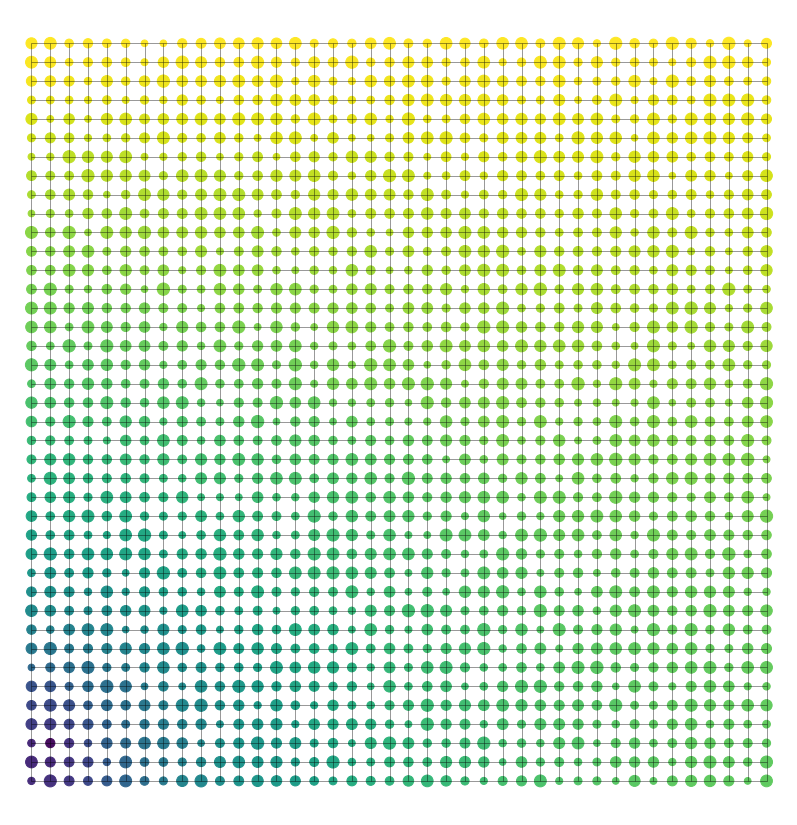

In [17]:
pn['pore.concentration'] = rxd['pore.concentration']

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot()
fig = openpnm.topotools.plot_connections(network=pn, color='k', alpha=0.4, ax=ax)
fig = openpnm.topotools.plot_coordinates(network=pn, color_by=pn['pore.concentration'], size_by=pn['pore.diameter'],
                                        cmap='viridis', ax=ax, markersize=150)

_ = plt.axis('off')

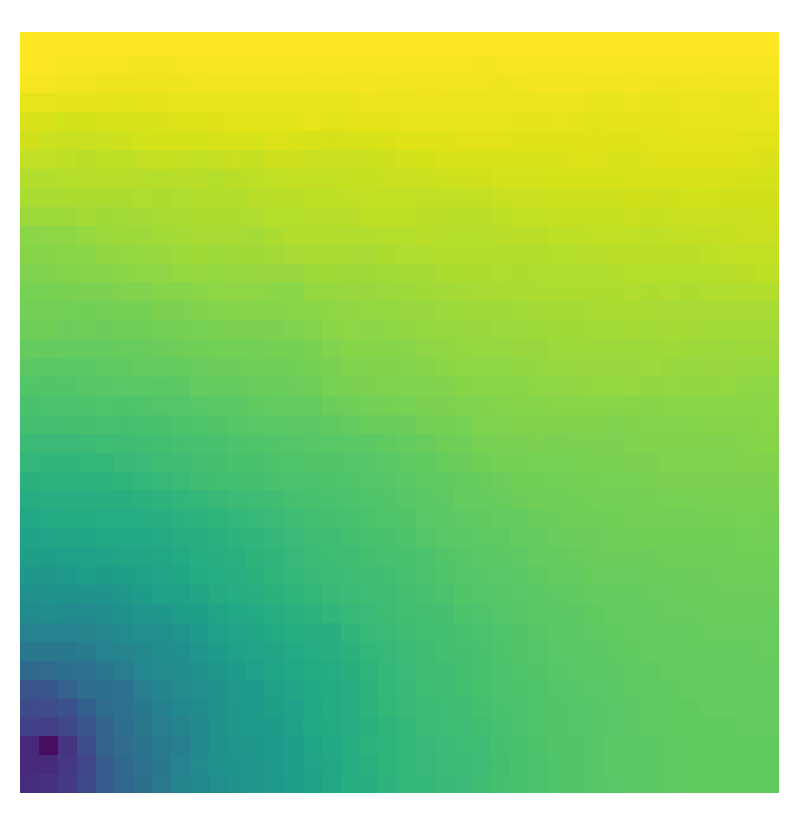

In [22]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot()
fig = openpnm.topotools.plot_connections(network=pn, color='k', alpha=0, ax=ax)
fig = openpnm.topotools.plot_coordinates(network=pn, color_by=pn['pore.concentration'], 
                                         cmap='viridis', ax=ax, markersize=500, marker='s')

_ = plt.axis('off')

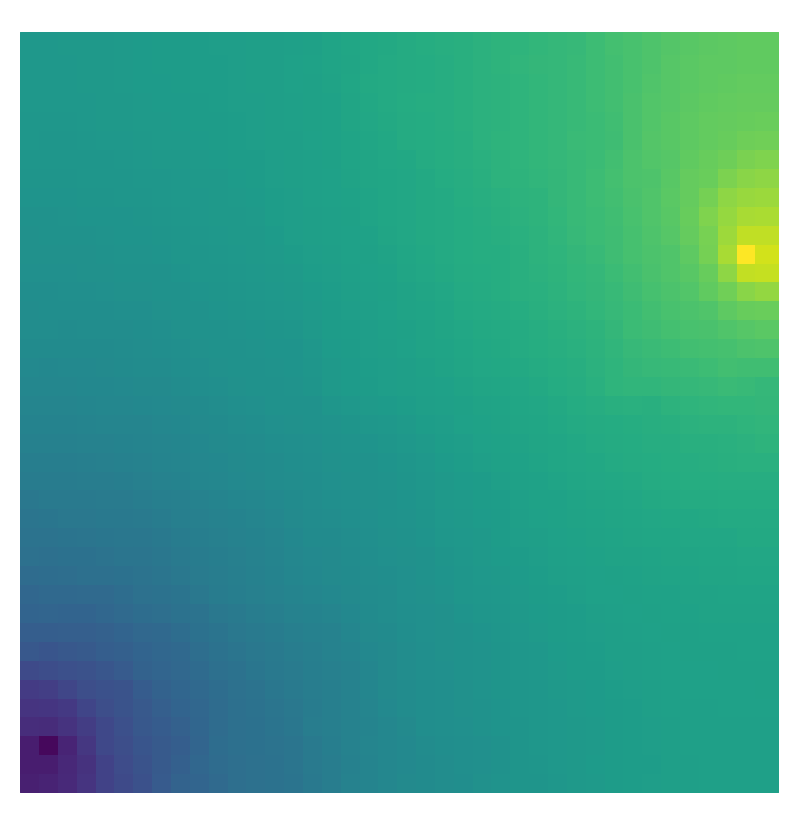

In [28]:
rxd = openpnm.algorithms.FickianDiffusion(network=pn)
rxd.setup(phase=gas)
rxd.set_source(propname='pore.sink', pores=[42])
rxd.set_value_BC(values=1, pores=[1548])


# rxd.set_value_BC(values=1, pores=[1548])
rxd.run()

pn['pore.concentration'] = rxd['pore.concentration']
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot()
fig = openpnm.topotools.plot_connections(network=pn, color='k', alpha=0, ax=ax)
fig = openpnm.topotools.plot_coordinates(network=pn, color_by=pn['pore.concentration'], 
                                         cmap='viridis', ax=ax, markersize=500, marker='s')

_ = plt.axis('off')